In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
project_path = r'D:\UCBerkeley\CourseWork\202001\W251\Homework\Project'
dir_train = 'train_videos'
dir_test = 'val_videos'
test_video = 'ASL_2006_10_10_scene2-camera1_AGAIN_v0_9.mov'
# test_video = 'ASL_2008_01_11_scene9-camera1_AGAIN_v0_0.mov'
test_video = 'ASL_2011_06_08_Brady_scene33-camera1_DEPOSIT_v0_4.mov'
cap = cv2.VideoCapture(os.path.join(project_path, dir_train, test_video))

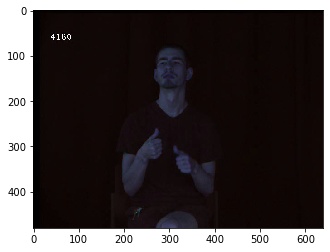

In [3]:
ret, first_frame = cap.read()
plt.imshow(first_frame)

In [4]:
first_frame.shape

(480, 640, 3)

`haarcascade_upperbody`, `haarcascade_lowerbody`, `haarcascade_fullbody` are not reliable in detecting corresponding body parts, even after changing `scaleFactor` and `minNeighbors`.  
Not reliable:  
* Detected body parts are incorrect
* A set of parameters do not work for multiple images. No body parts are detected for some images.

Reference: https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php

[[204 247 157 128]]
()
()


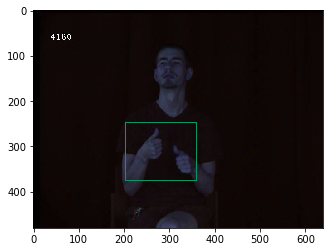

(<matplotlib.image.AxesImage at 0x2b9e65d1808>, None)

In [5]:
upper_body_cascade = cv2.CascadeClassifier(r'D:\UCBerkeley\CourseWork\202001\W251\Homework\Project\haarcascade_upperbody.xml')
upper_body = upper_body_cascade.detectMultiScale(first_frame, scaleFactor=1.01 , minNeighbors=5)
print(upper_body)

# Draw rectangles around upper body 
for (x,y,w,h) in upper_body:
    cv2.rectangle(first_frame, (x,y), (x+w, y+h), (12,150,100),2)
     
lower_body_cascade = cv2.CascadeClassifier(r'D:\UCBerkeley\CourseWork\202001\W251\Homework\Project\haarcascade_lowerbody.xml')
lower_body = lower_body_cascade.detectMultiScale(first_frame, scaleFactor=1.01 , minNeighbors=5)
print(lower_body)
for (x,y,w,h) in lower_body:
    cv2.rectangle(first_frame, (x,y), (x+w, y+h), (255,100,255),2)
    
# Draw rectangles around upper body 
for (x,y,w,h) in upper_body:
    cv2.rectangle(first_frame, (x,y), (x+w, y+h), (12,150,100),2)
     
full_body_cascade = cv2.CascadeClassifier(r'D:\UCBerkeley\CourseWork\202001\W251\Homework\Project\haarcascade_fullbody.xml')
full_body = full_body_cascade.detectMultiScale(first_frame, scaleFactor=1.01 , minNeighbors=5)
print(full_body)
for (x,y,w,h) in full_body:
    cv2.rectangle(first_frame, (x,y), (x+w, y+h), (255,100,255),2)

plt.imshow(first_frame),plt.show()

[[255  80  95  95]]


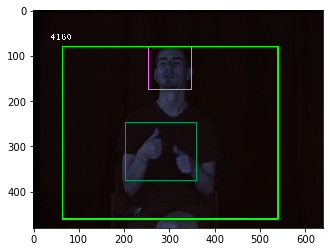

(<matplotlib.image.AxesImage at 0x2b9e7d24048>, None)

In [6]:
face_cascade = cv2.CascadeClassifier(r'D:\UCBerkeley\CourseWork\202001\W251\Homework\Project\haarcascade_frontalface_default.xml')
face = face_cascade.detectMultiScale(first_frame, scaleFactor=1.3 , minNeighbors=7)
print(face)
for (x,y,w,h) in face:
    cv2.rectangle(first_frame, (x,y), (x+w, y+h), (255,100,255),2)
    cv2.rectangle(first_frame, (x-w*2,y), (x+w*3, y+h*4), (0,255,0),2)
plt.imshow(first_frame),plt.show()

[[272  94  76  76]]
[[275  96  66  66]]
[[270  93  76  76]]
[[270  98  73  73]]
[[274  93  67  67]]
[[269  94  81  81]]
[[271  94  74  74]]
[[268  92  78  78]]
[[267  96  74  74]]
[[270  98  72  72]]
[[274  95  65  65]]
[[271  98  73  73]]
[[270  92  76  76]]
[[269  96  75  75]]
[[269  92  81  81]]
[[272 151  66  66]]
[[274 152  66  66]]
[[277 151  64  64]]
[[277 148  63  63]]
[[262 154  58  58]]
[[278 151  62  62]]
[[276 151  65  65]]
[[271 156  62  62]]
[[276 151  64  64]]
[[277 149  61  61]]
[[277 154  63  63]]
[[282  76  82  82]]
[[272  85  79  79]]
[[282  83  77  77]]
[[279  89  78  78]]
[[281  81  78  78]]
[[289  70  83  83]]
[[268  86  83  83]]
[[270  75  83  83]]
[[281  76  83  83]]
[[273  72  84  84]]
[[284  84  75  75]]
[[287  81  75  75]]
[[280  75  85  85]]
[[282  80  80  80]]
[[279  71  88  88]]
[[269  84  81  81]]
[[280  64  83  83]]
[[288  58  86  86]]
[[284  67  89  89]]
[[283  65  90  90]]
[[299  62  77  77]]
[[285  62  86  86]]
[[289  75  88  88]]
[[296  84  81  81]]


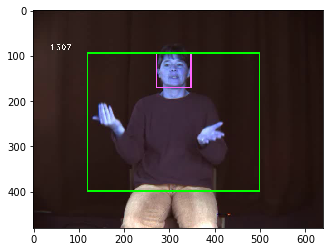

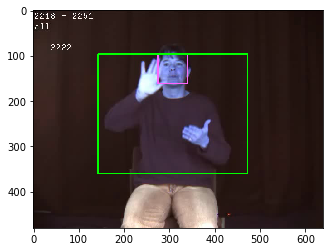

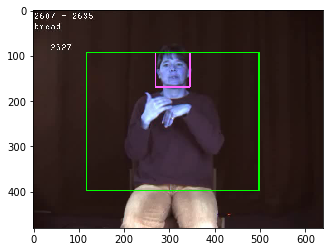

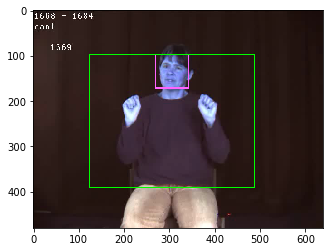

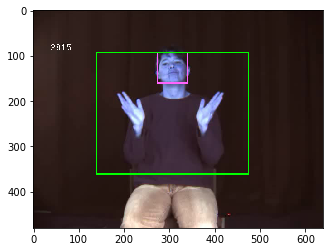

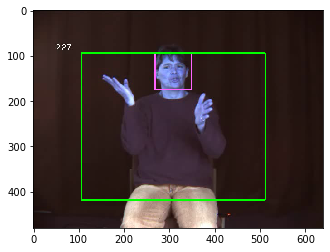

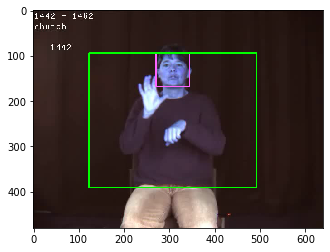

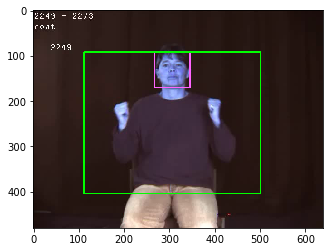

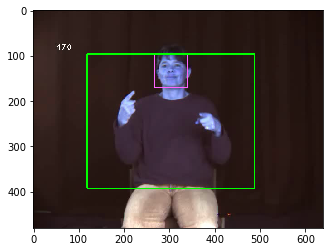

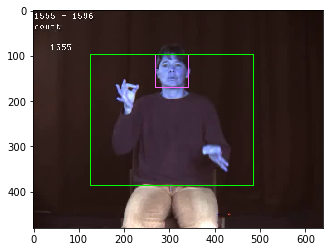

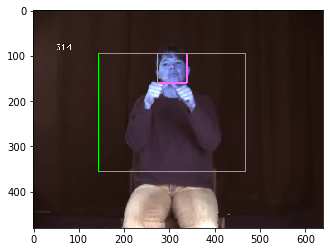

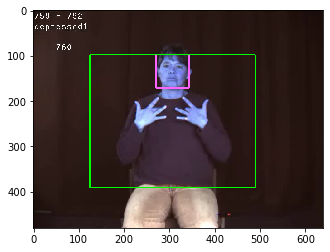

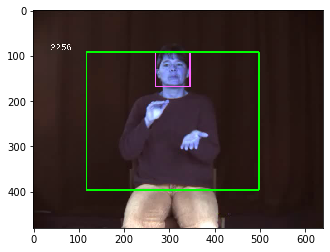

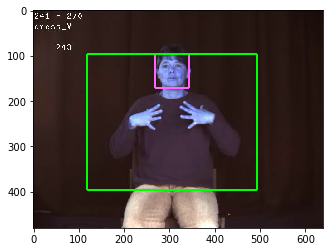

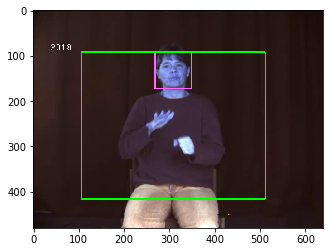

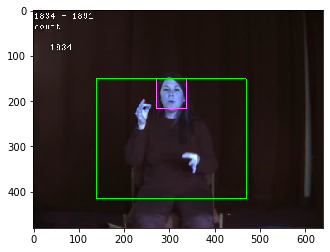

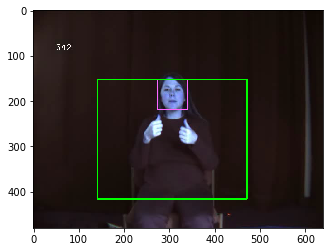

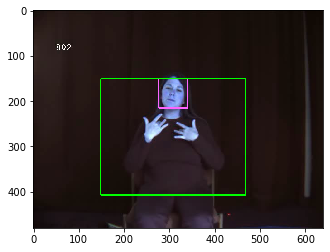

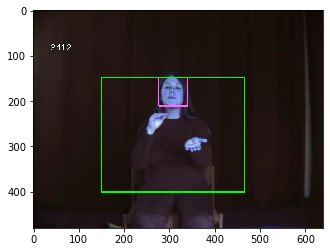

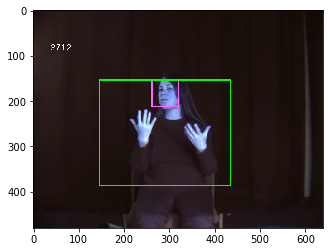

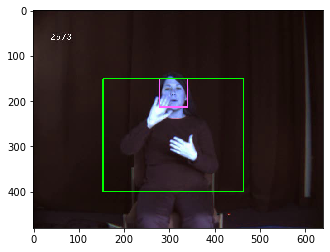

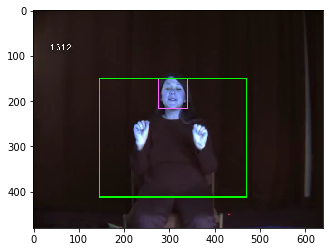

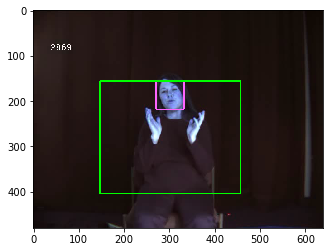

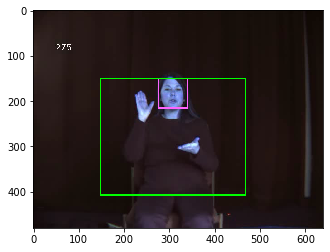

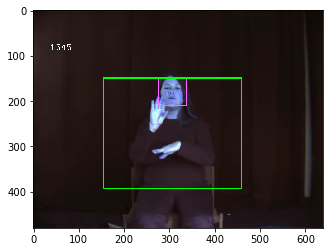

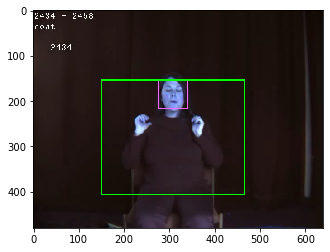

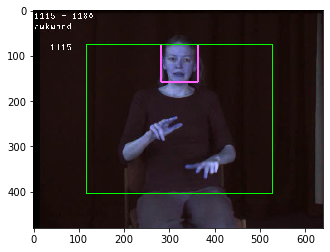

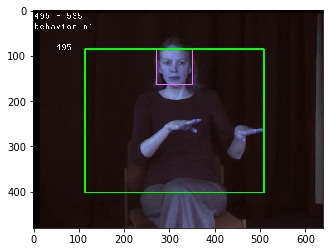

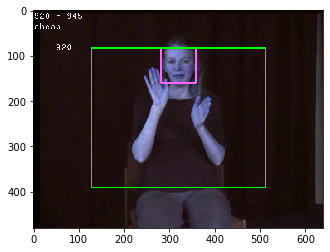

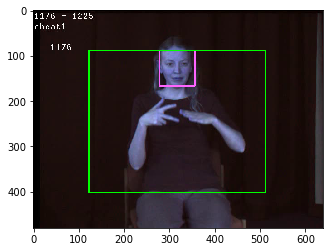

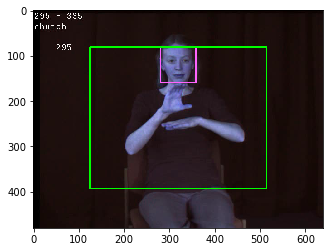

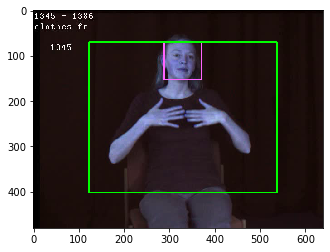

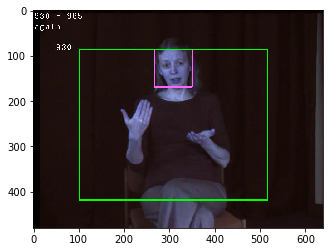

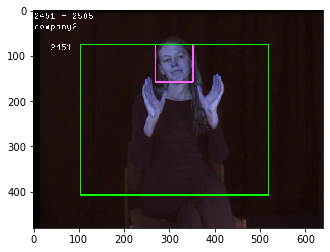

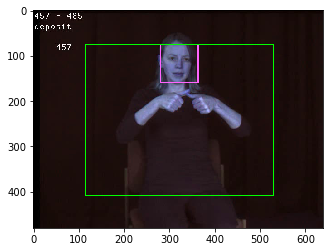

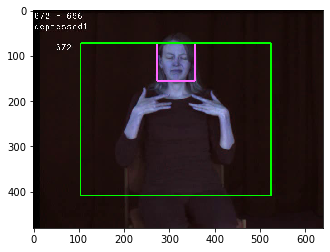

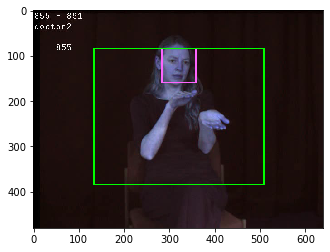

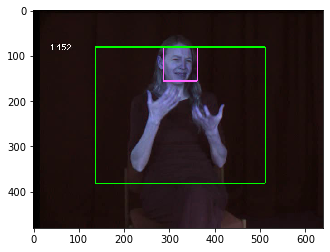

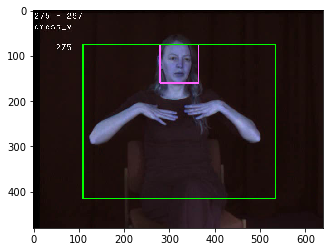

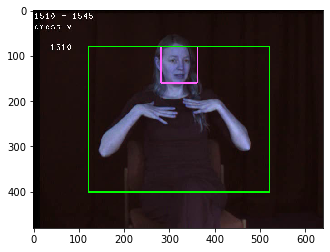

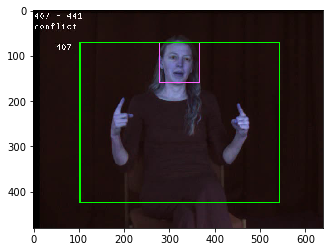

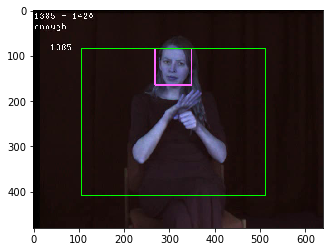

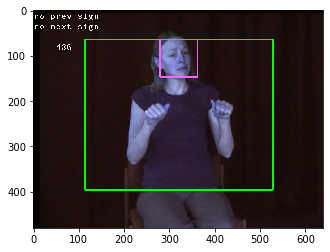

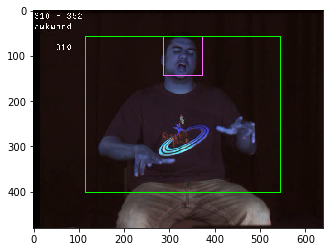

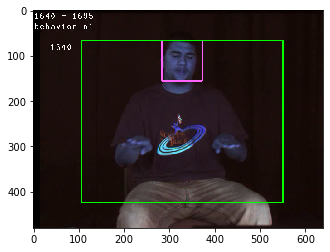

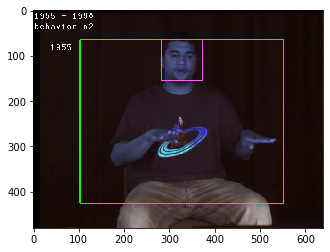

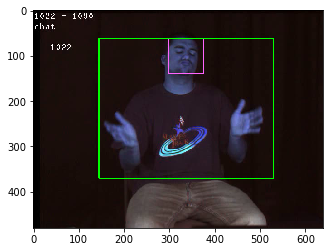

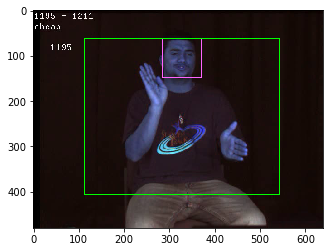

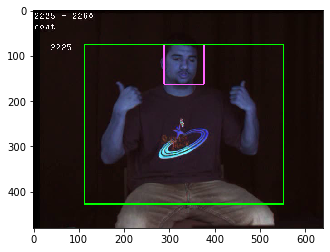

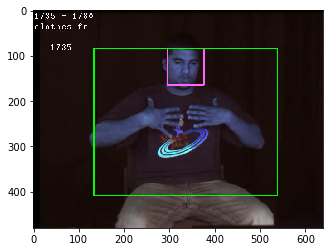

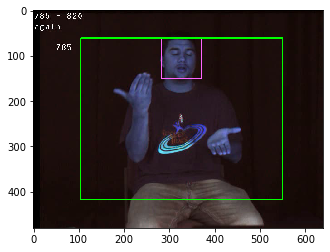

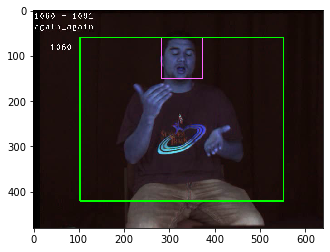

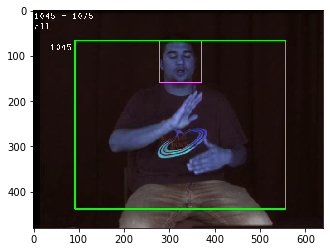

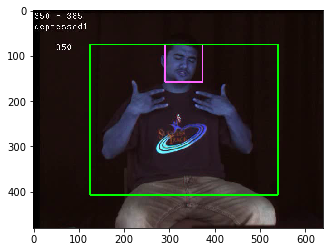

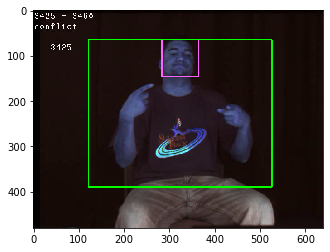

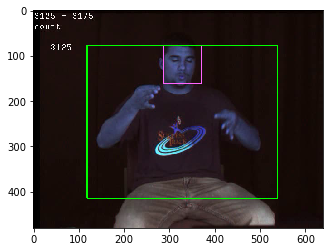

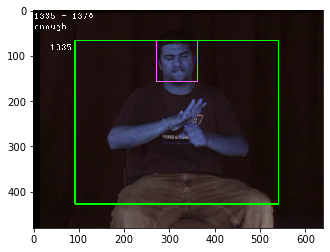

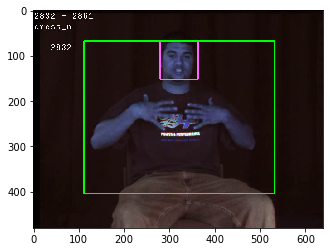

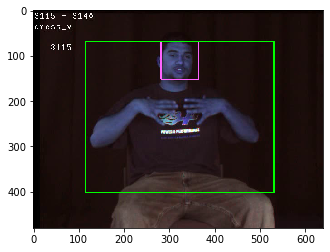

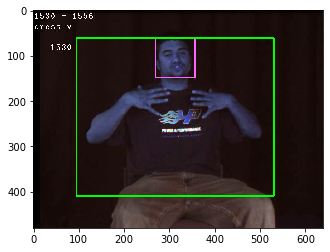

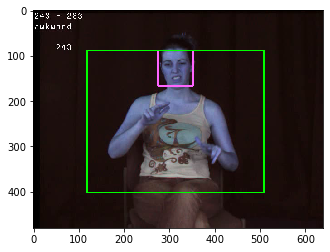

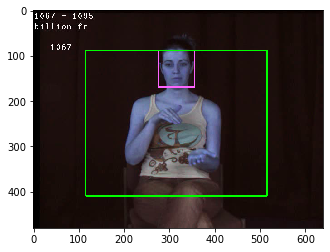

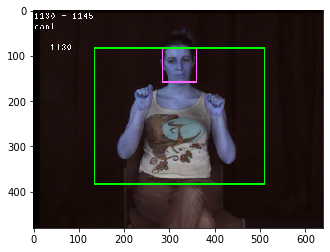

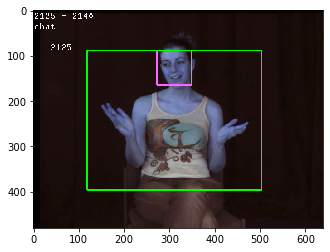

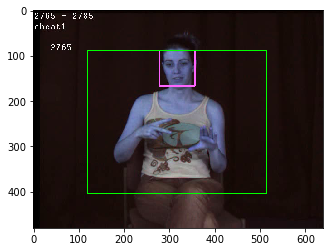

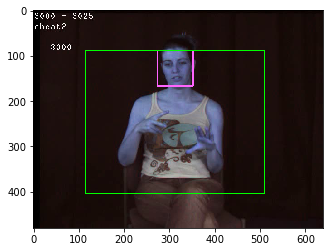

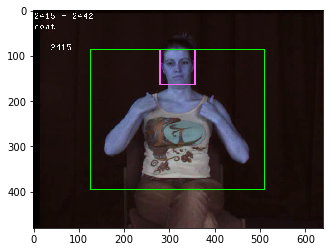

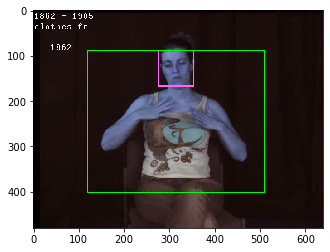

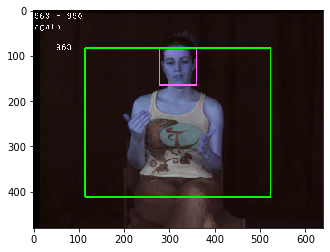

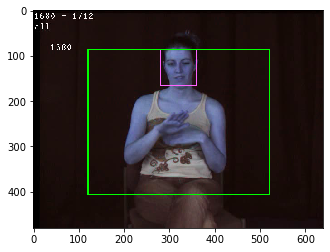

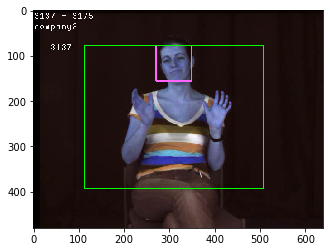

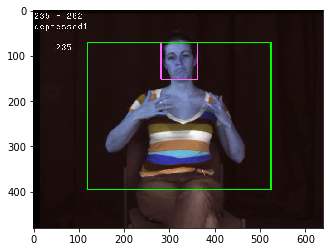

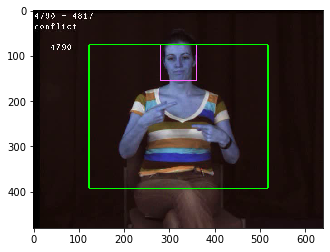

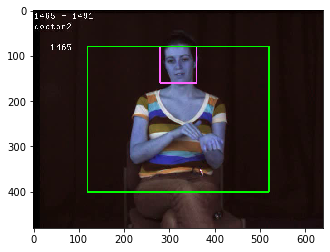

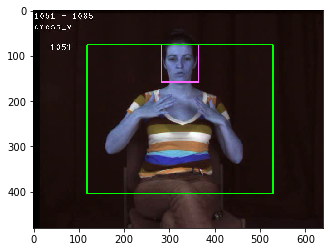

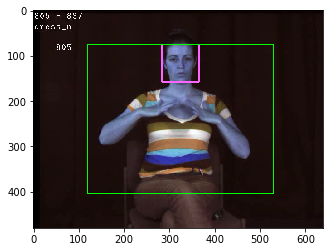

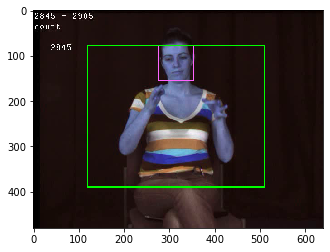

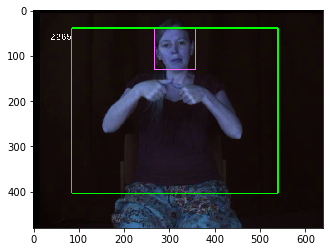

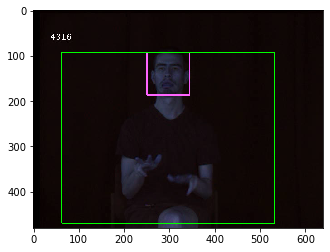

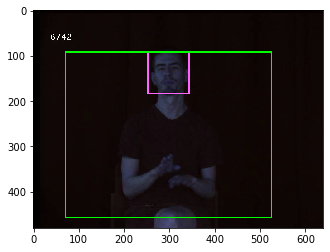

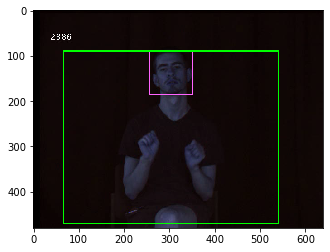

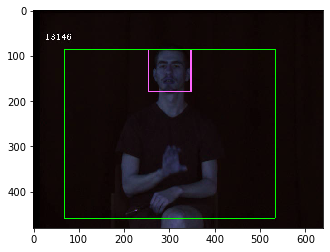

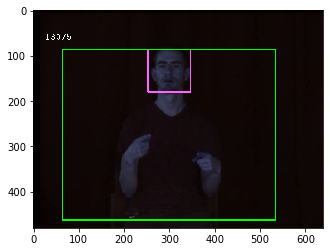

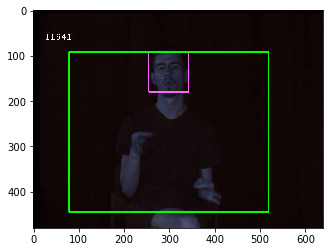

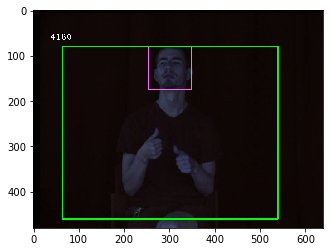

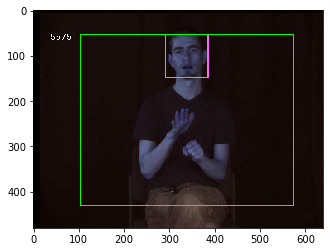

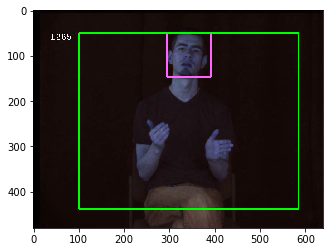

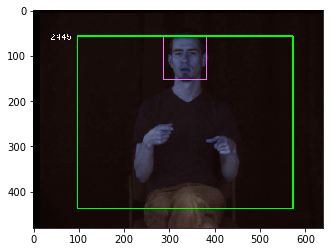

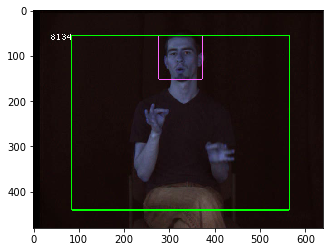

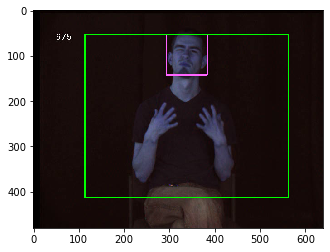

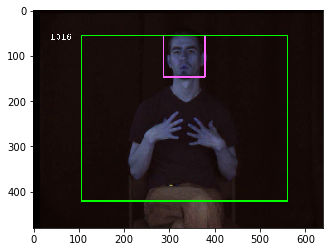

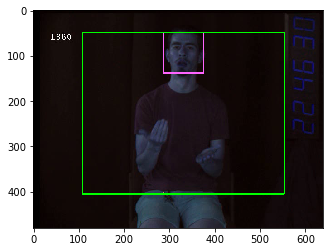

In [7]:
files_mov_lst = [f for f in os.listdir(os.path.join(project_path, dir_train)) 
                 if f[-4:]=='.mov' 
                 # and 'Brady' not in f
                 ]
for f in files_mov_lst:
    cap = cv2.VideoCapture(os.path.join(project_path, dir_train, f))
    ret, first_frame = cap.read()
    face_cascade = cv2.CascadeClassifier(r'D:\UCBerkeley\CourseWork\202001\W251\Homework\Project\haarcascade_frontalface_default.xml')
    face = face_cascade.detectMultiScale(first_frame, scaleFactor=1.3, minNeighbors=7)
    print(face)
    for (x,y,w,h) in face:
        cv2.rectangle(first_frame, (x,y), (x+w, y+h), (255,100,255),2)
        cv2.rectangle(first_frame, (x-w*2,y), (x+w*3, y+h*4), (0,255,0),2)
        # only draw the first face
        break
    plt.imshow(first_frame),plt.show()

In [8]:
plt.imsave(os.path.join(project_path, 
                        'writeup_videos_images', 'cv2_AGAIN_c8_upper_body.png'), first_frame)

In [ ]:
files_mov_lst = [f for f in os.listdir(os.path.join(project_path, dir_test)) 
                 if f[-4:]=='.mov' and 'Brady' not in f]
for f in files_mov_lst:
    cap = cv2.VideoCapture(os.path.join(project_path, dir_test, f))
    ret, first_frame = cap.read()
    face_cascade = cv2.CascadeClassifier(r'D:\UCBerkeley\CourseWork\202001\W251\Homework\Project\haarcascade_frontalface_default.xml')
    face = face_cascade.detectMultiScale(first_frame, scaleFactor=1.3, minNeighbors=7)
    print(face)
    for (x,y,w,h) in face:
        cv2.rectangle(first_frame, (x,y), (x+w, y+h), (255,100,255),2)
        cv2.rectangle(first_frame, (x-w*2,y), (x+w*3, y+h*4), (0,255,0),2)
        break
    plt.imshow(first_frame),plt.show()


Increase contrast for potentially easier detection of features  
* Reference: https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html

Analyze color histogram
* Reference: https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/


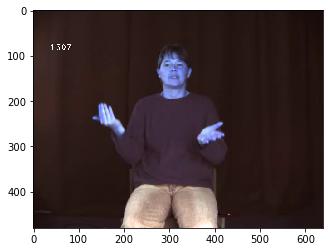

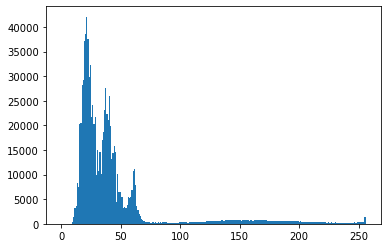

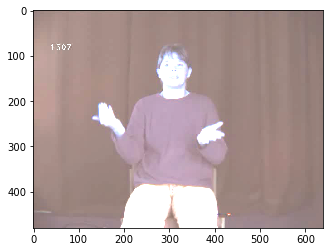

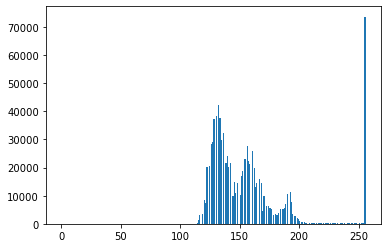

In [6]:
cap = cv2.VideoCapture(os.path.join(project_path, dir_train, test_video))
ret, first_frame = cap.read()
plt.imshow(first_frame),plt.show()
plt.hist(first_frame.ravel(),256,[0,256]); plt.show()
first_frame = cv2.convertScaleAbs(first_frame, alpha=1.5, beta=100)
plt.imshow(first_frame),plt.show()
plt.hist(first_frame.ravel(),256,[0,256]); plt.show()
